# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [396]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [397]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

print(type(map_box_api)) #check env file 

<class 'str'>


## Load Data

In [398]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head(30)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [399]:
# Calculate the sum number of dwelling types units per year (hint: use groupby) #summed to see how many 
num_dwel_per_yr = to_data.groupby('year').sum()#.reset_index() 
num_dwel_per_yr = num_dwel_per_yr[['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]
num_dwel_per_yr #just grabbing dwelling types

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [400]:
# Save the dataframe as a csv file
num_dwel_per_yr.to_csv('num_dwell_per_yr.csv')

In [401]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    fig = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=90, height=400, width=500, color=color)
    return fig

In [402]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
_2001 = create_bar_chart(num_dwel_per_yr.loc[2001], 'Dwelling types in Toronto in 2001', '2001', 'dwelling type units', 'red')

# Bar chart for 2006
_2006 = create_bar_chart(num_dwel_per_yr.loc[2006], 'Dwelling types in Toronto in 2006', '2006', 'dwelling type units', 'blue')

# Bar chart for 2011
_2011 = create_bar_chart(num_dwel_per_yr.loc[2011], 'Dwelling types in Toronto in 2011', '2011', 'dwelling type units', 'orange')

# Bar chart for 2016
_2016 = create_bar_chart(num_dwel_per_yr.loc[2016], 'Dwelling types in Toronto in 2016', '2016', 'dwelling type units', 'pink')


test = pn.Column( 
    _2001,
    _2006,
    _2011,
    _2016
)
test ##for visualisation, makking sure all the charts are correct

Column
    [0] HoloViews(Bars)
    [1] HoloViews(Bars)
    [2] HoloViews(Bars)
    [3] HoloViews(Bars)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [403]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs = to_data.groupby('year').mean()[['shelter_costs_owned', 'shelter_costs_rented']]
shelter_costs.reset_index()

,year,shelter_costs_owned,shelter_costs_rented
0,2001,846.878571,1085.935714
1,2006,1316.800000,925.414286
2,2011,1448.214286,1019.792857
3,2016,1761.314286,1256.321429


In [404]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    chart = data.hvplot.line(title = title, x=xlabel, y=ylabel, xlabel=xlabel, ylabel=ylabel, color=color)
    return chart

In [405]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
# Line chart for owned dwellings
ave_plot_costs_owned = create_line_chart(shelter_costs, title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", xlabel='year', ylabel='shelter_costs_owned', color='green')

# Line chart for rented dwellings
ave_plot_costs_rented = create_line_chart(shelter_costs, title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", xlabel='year', ylabel='shelter_costs_rented', color='orange')

line_monthly_costs = pn.Row(
    ave_plot_costs_owned,
    ave_plot_costs_rented
)
line_monthly_costs

Row
    [0] HoloViews(Curve)
    [1] HoloViews(Curve)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [406]:
# Calculate the average house value per year
ave_house_value_yr = to_data['average_house_value'].groupby('year').mean()
#to_data.groupby('year').mean()[['shelter_costs_owned', 'shelter_costs_rented']]

ave_house_value_yr

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

In [407]:
# Plot the average house value per year as a line chart
ave_house_value_plot = ave_house_value_yr.hvplot.line(title='Average House Value in Toronto')

ave_house_value_plot

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [451]:
# Create a new DataFrame with the mean house values by neighbourhood per year
values_neighbourhood = to_data[['neighbourhood', 'average_house_value']]
values_neighbourhood.reset_index().groupby('neighbourhood')
values_neighbourhood.head(10)

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864
2001,Bathurst Manor,304749
2001,Bay Street Corridor,257404
2001,Bayview Village,327644
2001,Bayview Woods-Steeles,343535


In [454]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
values_neighbourhood.hvplot.line(
    "year",
    "average_house_value",
    xlabel="year",
    ylabel="average_house_value",
    groupby="neighbourhood",
    title='Ave house values by neighbourhood per year'
)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [410]:
# Fetch the data of all dwelling types per year
dwelling_types = to_data[['neighbourhood', 'single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]

#all dwelling types (fetched all columns except, ave house value and costs bc they arent dwelling types)

In [411]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types.hvplot.bar(
    "year",
    xlabel="year",
    ylabel="number of dwelling types",
    groupby="neighbourhood",
    rot=90
)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [443]:
# Getting the data from the top 10 expensive neighbourhoods
top_10 = to_data.groupby('neighbourhood').mean().reset_index().sort_values('average_house_value', ascending=False).reset_index().drop(columns=['index'])
top_10 = top_10[:10]
top_10_expensive_neighbourhoods = top_10[['neighbourhood', 'average_house_value']]
top_10

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [445]:
top_10_expensive_neighbourhoods # just value and neighbourhood

,neighbourhood,average_house_value
0,Bridle Path-Sunnybrook-York Mills,1526485.75
1,Forest Hill South,1195992.50
2,Lawrence Park South,1094027.75
3,Rosedale-Moore Park,1093640.00
4,St.Andrew-Windfields,999107.00
5,Casa Loma,981064.25
6,Bedford Park-Nortown,930415.25
7,Forest Hill North,851680.50
8,Kingsway South,843234.25
9,Yonge-St.Clair,813220.25


In [446]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods.hvplot.bar(
    'neighbourhood',
    title='Most Expensive Neighbourhoods by House Value',
    xlabel="Neighbourhoods",
    ylabel="Average House Value(Price)",
    rot=30,
    color='green'
)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [415]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

df_neighbourhood_locations.head(20)

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
5,Bathurst Manor,43.764813,-79.456055
6,Bay Street Corridor,43.657511,-79.385721
7,Bayview Village,43.776361,-79.377117
8,Bayview Woods-Steeles,43.796802,-79.382118
9,Bedford Park-Nortown,43.731486,-79.420227


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [416]:
# Calculate the mean values for each neighborhood
map_box_api

ave_neighbourhood_values = values_neighbourhood.groupby('neighbourhood').mean()
ave_neighbourhood_values = ave_neighbourhood_values.reset_index()
ave_neighbourhood_values

,neighbourhood,average_house_value
0,Agincourt North,329811.50
1,Agincourt South-Malvern West,334189.00
2,Alderwood,427922.50
3,Annex,746977.00
4,Banbury-Don Mills,612039.00
...,...,...
135,Wychwood,565976.50
136,Yonge-Eglinton,809745.75
137,Yonge-St.Clair,813220.25
138,York University Heights,305899.50


In [417]:
# Join the average values with the neighbourhood locations
#df_neighbourhood_locations.concat(ave_neighbourhood_values, axis=1)

combined_location_values = pd.concat([df_neighbourhood_locations, ave_neighbourhood_values], axis=1)

combined_location_values = combined_location_values.loc[:,~combined_location_values.columns.duplicated()] #drop duplicated 'neighbourhood' columns

combined_location_values

,neighbourhood,lat,lon,average_house_value
0,Agincourt North,43.805441,-79.266712,329811.50
1,Agincourt South-Malvern West,43.788658,-79.265612,334189.00
2,Alderwood,43.604937,-79.541611,427922.50
3,Annex,43.671585,-79.404001,746977.00
4,Banbury-Don Mills,43.737657,-79.349718,612039.00
...,...,...,...,...
135,Wychwood,43.676919,-79.425515,565976.50
136,Yonge-Eglinton,43.704689,-79.403590,809745.75
137,Yonge-St.Clair,43.687859,-79.397871,813220.25
138,York University Heights,43.765736,-79.488883,305899.50


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

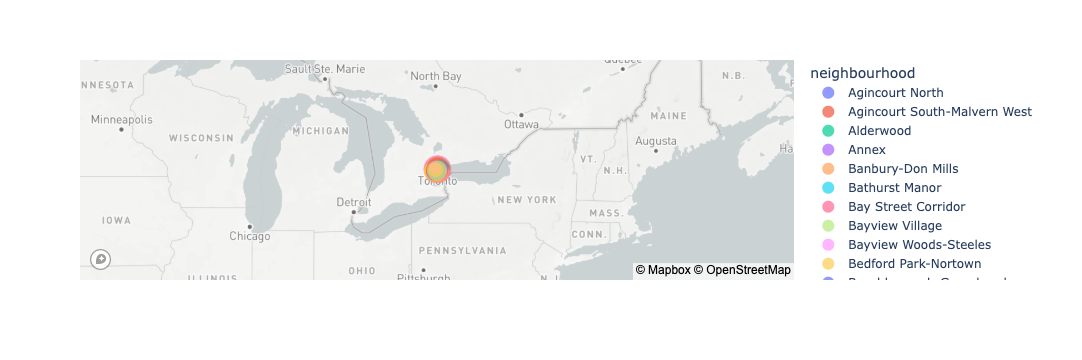

In [418]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(map_box_api)

map_plot = px.scatter_mapbox(
    combined_location_values,
    lat='lat',
    lon='lon',
    color='neighbourhood',
    size='average_house_value',
    #color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=4
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [419]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [420]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [421]:
# Create the sunburst chart
# YOUR CODE HERE!